Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

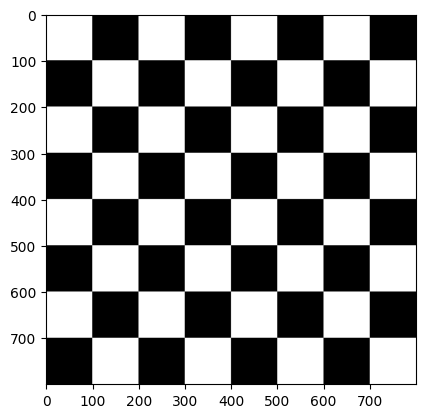

In [11]:
tablero = np.zeros((800, 800, 1), dtype = np.uint8)
#Modifica un par de zonas rectangulares de la imagen

for i in range(0, 1000, 200):
    for j in range(0, 1000, 200):
        tablero[i:(i + 100), j:(j + 100), 0] = 255

for i in range(100, 1000, 200):
    for j in range(100, 1000, 200):
        tablero[i:(i + 100), j:(j + 100), 0] = 255

#Muestra la imagen con matplotlib
plt.imshow(tablero, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

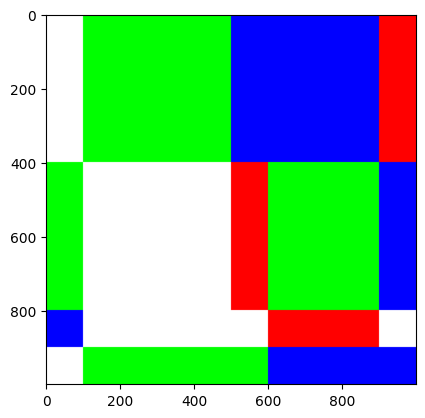

In [9]:
color_img = np.zeros((1000, 1000,3), dtype = np.uint8)

#Primera Linea

color_img[0:400, 0:100, :] = 255
color_img[0:400, 100:500,1] = 255
color_img[0:400, 500:900,2] = 255
color_img[0:400, 900:1000,0] = 255

# Segunda Linea

color_img[400:800, 0:100,1] = 255
color_img[400:800, 100:500, :] = 255
color_img[400:800, 500:600,0] = 255
color_img[400:800, 600:900,1] = 255
color_img[400:800, 900:1000,2] = 255

# Tercera Linea

color_img[800:900, 0:100,2] = 255
color_img[800:900, 100:600, :] = 255
color_img[800:900, 600:900,0] = 255
color_img[800:900, 900:1000, :] = 255 

# Cuarta Linea

color_img[900:1000, 0:100, :] = 255 
color_img[900:1000, 100:600,1] = 255
color_img[900:1000, 600:1000,2] = 255

cv2.imwrite('ArteModrian.jpg', color_img)

plt.imshow(color_img) 
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

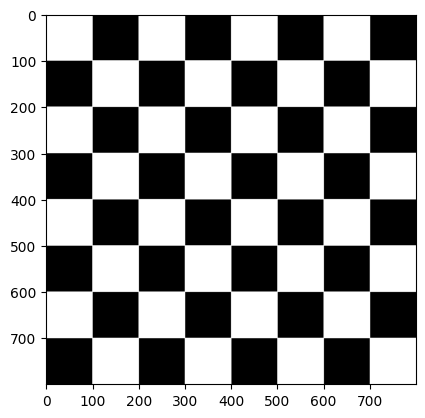

In [10]:
tableroCV = np.zeros((800, 800, 3), dtype = np.uint8)

#Modifica un par de zonas rectangulares de la imagen

for i in range (0, 800, 200):
    for j in range (0, 800, 200):
        cv2.rectangle(tableroCV, (i, j), ((i + 100), (j + 100)), (255, 255, 255), -1)
        cv2.rectangle(tableroCV, ((i + 100), (j + 100)), ((i + 200), (j + 200)), (255, 255, 255), -1)

plt.imshow(tableroCV) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

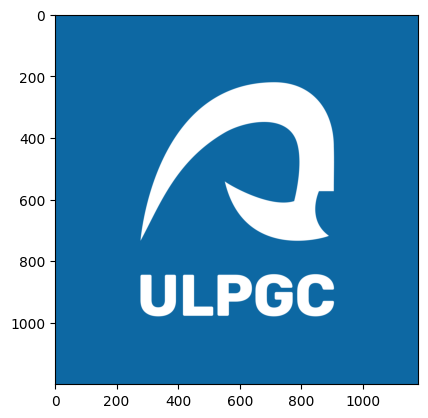

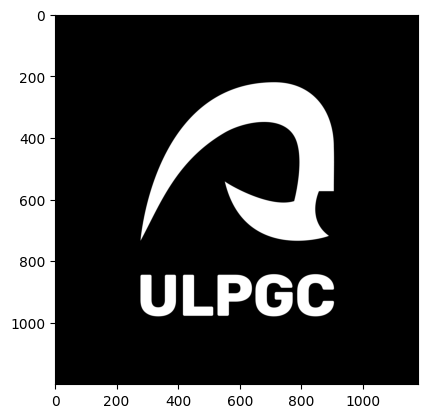

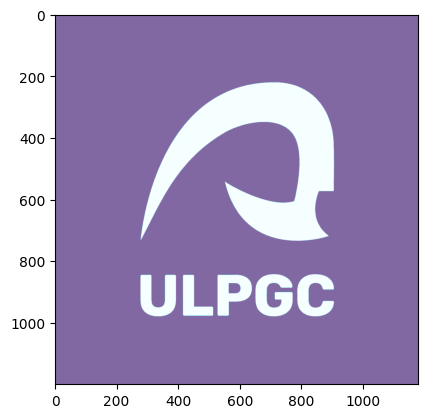

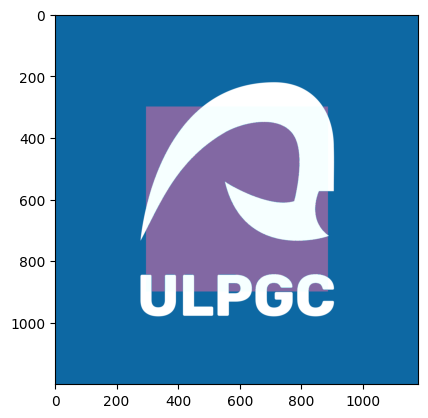

In [62]:
#Carga imagen desde disco
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png') 

#Ejemplos

#Ejemplo 1 = OpenCV lee las imágenes de disco en formato BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

#Ejemplo 2 = Fuerza lectura en grises
Copyimg = img
Copyimg = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png', cv2.IMREAD_GRAYSCALE) 
plt.imshow(Copyimg, cmap='gray') 
plt.show()


# Modificar la intensidad del canal rojo
Copyimg2 = img
Copyimg2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Copyimg2[:, :, 0] = np.clip(Copyimg2[:, :, 0] * 10, 0, 255)

plt.imshow(Copyimg2)
plt.show()

# Modificar la intensidad del canal verde en la región

Copyimg3 = img
Copyimg3 = cv2.cvtColor(Copyimg3, cv2.COLOR_BGR2RGB)

altura, ancho, _ = img_rgb.shape
Fila_inicial = altura // 4
Columna_inicial = ancho // 4
Fila_Final = 3 * altura // 4
Columna_Final = 3 * ancho // 4

Copyimg3[Fila_inicial:Fila_Final, Columna_inicial:Columna_Final, 0] = np.clip(Copyimg3[Fila_inicial:Fila_Final, Columna_inicial:Columna_Final, 0] * 10, 0, 255)

cv2.imwrite('ModificacionCuadradoRojo.jpg', Copyimg3)

plt.imshow(Copyimg3)
plt.show()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [65]:
vid = cv2.VideoCapture(0)

while(True):      
    ret, frame = vid.read()

    if ret:
        # Convertimos el fotograma a escala de grises para simplificar el cálculo de brillo
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontramos el valor mínimo (más negro) y máximo (más blanco) y sus ubicaciones
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)

        # Dibujamos los círculos, Rojo para el más claro y Verde para el más oscuro
        cv2.circle(frame, max_loc, 8, (0,0,255), -1)
        cv2.circle(frame, min_loc, 8, (0,255,0), -1)

        cv2.imshow('Cam', frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [71]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int((vid.get(cv2.CAP_PROP_FRAME_WIDTH) * 2) / 3)
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT) / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w * 3)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Creamos una imagen en forma de línea horizontal con 3 secciones
collage = np.zeros((h, w * 3, 3), dtype=np.uint8)

sec1 = collage[:, 0:w]
sec2 = collage[:, w:2*w]
sec3 = collage[:, 2*w:3*w]

while True:      
    ret, frameIN = vid.read()

    if ret:
        frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

        sec1[:, :, :] = frame
        sec2[:, :, :] = frame - (255 - frame) //3
        sec3[:, :, :] = 255 - frame

        cv2.imshow('Pop Art - Negativo Progresivo', collage)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()